# The Dataset

Contains information about greenhouse gas (but mostly CO2) emissions for each country from 1750 to today, with many ways to look at it (per capita, per MWh of energy, produced by coal-burning, etc.)

https://ourworldindata.org/explorers/co2?facet=none&country=CHN~USA~IND~GBR~OWID_WRL&Gas=CO₂&Accounting=Production-based&Fuel=Total&Count=Per+MWh+of+energy
Just under the CO2 Data Explorer heading in the top left is a link to the github. The file downloaded is 'owid-co2-data.csv'

Questions:
 - Which countries have shown the least increase (or greatest reduction) of CO2 emissions per capita since 2010?
 - What percentage of each country's emissions have been made by burning coal since 2010?

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# All Data

In [3]:
df = pd.read_csv("data/owid-co2-data.csv")
df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [4]:
print("INDEX: " + str(df.index))

print("\n\nCOLUMNS:\n" + "="*10)
for col in df.columns:
    print(col)

INDEX: RangeIndex(start=0, stop=25191, step=1)


COLUMNS:
iso_code
country
year
co2
co2_per_capita
trade_co2
cement_co2
cement_co2_per_capita
coal_co2
coal_co2_per_capita
flaring_co2
flaring_co2_per_capita
gas_co2
gas_co2_per_capita
oil_co2
oil_co2_per_capita
other_industry_co2
other_co2_per_capita
co2_growth_prct
co2_growth_abs
co2_per_gdp
co2_per_unit_energy
consumption_co2
consumption_co2_per_capita
consumption_co2_per_gdp
cumulative_co2
cumulative_cement_co2
cumulative_coal_co2
cumulative_flaring_co2
cumulative_gas_co2
cumulative_oil_co2
cumulative_other_co2
trade_co2_share
share_global_co2
share_global_cement_co2
share_global_coal_co2
share_global_flaring_co2
share_global_gas_co2
share_global_oil_co2
share_global_other_co2
share_global_cumulative_co2
share_global_cumulative_cement_co2
share_global_cumulative_coal_co2
share_global_cumulative_flaring_co2
share_global_cumulative_gas_co2
share_global_cumulative_oil_co2
share_global_cumulative_other_co2
total_ghg
ghg_per_capita
total_g

# General Overview

In [5]:
df.describe()

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25191.000000,23949.000000,23307.000000,3976.000000,12248.000000,12218.000000,17188.000000,16860.000000,4382.000000,4381.000000,...,5651.000000,5655.000000,5655.000000,5655.000000,5655.000000,2.289200e+04,1.353800e+04,8690.000000,8681.000000,6803.000000
mean,1953.195546,267.861942,4.170811,-2.415624,12.888607,0.113037,175.358171,1.551520,15.000326,0.875319,...,6.870665,79.072368,1.902152,29.088635,0.601973,7.068041e+07,2.877088e+11,1569.083895,25568.487454,1.850291
std,53.788944,1521.680894,14.912201,182.444942,77.258563,0.148907,786.106838,2.552112,40.471977,5.477923,...,7.270324,545.014528,3.318293,198.147748,0.890161,3.794737e+08,2.180094e+12,9066.102799,33319.956208,1.575161
min,1750.000000,0.000000,0.000000,-1657.998000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.050000
25%,1924.000000,0.528000,0.253000,-0.892500,0.129000,0.020000,0.322000,0.054000,0.253250,0.021000,...,2.095500,2.005000,0.691000,0.510000,0.221000,1.287425e+06,9.828867e+09,6.997000,3270.369000,0.856000
50%,1967.000000,4.857000,1.250000,1.953000,0.557000,0.070000,3.981000,0.441500,2.071500,0.068000,...,4.442000,8.530000,1.077000,3.460000,0.377000,4.869928e+06,3.037019e+10,61.404500,13701.318000,1.407000
75%,1995.000000,42.818000,4.657500,9.700500,2.896750,0.156000,35.532750,2.149000,12.603750,0.203000,...,8.975000,30.025000,1.619000,11.195000,0.589000,1.757624e+07,1.268944e+11,352.884500,35493.775000,2.351000
max,2020.000000,36702.503000,748.639000,1028.487000,1626.371000,2.738000,15062.902000,34.184000,435.034000,94.711000,...,53.650000,8298.270000,39.795000,3078.270000,10.056000,7.794799e+09,1.136302e+14,162194.290000,317582.498000,13.493000


# CO2 per capita for all countries

In [6]:
pt = pd.pivot_table(df, values=['co2_per_capita'], columns=['country'], index=['year'])
pt

co2_per_capita                                                 \
country    Afghanistan Africa Albania Algeria Andorra Angola Anguilla   
year                                                                    
1750               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1760               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1770               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1780               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1790               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
...                ...    ...     ...     ...     ...    ...      ...   
2016             0.191  1.119   1.556   3.673   6.068  1.089   10.661   
2017             0.189  1.113   1.838   3.743   6.044  0.953    9.795   
2018             0.224  1.086   1.642   3.824   6.423  0.791    9.696   
2019             0.319  1.077   1.688   3.871   6.505  0.738    9.378   
2020             0.312  0.990   1.576   3.535   6.035  0.675    8.227   

                                               ...                        \
country Antigua and Barbuda Argentina Armenia  ... United States Uruguay   
year                                           ...                         
1750                    NaN       NaN     NaN  ...           NaN     NaN   
1760                    NaN       NaN     NaN  ...           NaN     NaN   
1770                    NaN       NaN     NaN  ...           NaN     NaN   
1780                    NaN       NaN     NaN  ...           NaN     NaN   
1790                    NaN       NaN     NaN  ...           NaN     NaN   
...                     ...       ...     ...  ...           ...     ...   
2016                  5.194     4.389   1.772  ...        16.247   1.904   
2017                  5.145     4.274   1.880  ...        16.020   1.793   
2018                  5.176     4.082   1.974  ...        16.434   1.905   
2019                  5.008     3.742   1.869  ...        15.972   1.902   
2020                  4.395     3.473   1.988  ...        14.238   1.681   

                                                                            
country Uzbekistan Vanuatu Venezuela Vietnam  World  Yemen Zambia Zimbabwe  
year                                                                        
1750           NaN     NaN       NaN     NaN  0.012    NaN    NaN      NaN  
1760           NaN     NaN       NaN     NaN  0.013    NaN    NaN      NaN  
1770           NaN     NaN       NaN     NaN  0.015    NaN    NaN      NaN  
1780           NaN     NaN       NaN     NaN  0.017    NaN    NaN      NaN  
1790           NaN     NaN       NaN     NaN  0.021    NaN    NaN      NaN  
...            ...     ...       ...     ...    ...    ...    ...      ...  
2016         3.440   0.527     5.677   2.059  4.750  0.384  0.346    0.765  
2017         3.353   0.488     5.494   2.064  4.760  0.358  0.387    0.673  
2018         3.533   0.601     4.160   2.342  4.802  0.350  0.422    0.821  
2019         3.462   0.604     3.478   2.699  4.758  0.344  0.395    0.748  
2020         3.370   0.591     2.975   2.613  4.465  0.328  0.358    0.709  

[226 rows x 230 columns]

# Change in CO2 per capita over the last decade

In [12]:
diff = pt.diff(periods=10)
diff

co2_per_capita                                                 \
country    Afghanistan Africa Albania Algeria Andorra Angola Anguilla   
year                                                                    
1750               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1760               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1770               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1780               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
1790               NaN    NaN     NaN     NaN     NaN    NaN      NaN   
...                ...    ...     ...     ...     ...    ...      ...   
2016             0.129 -0.042   0.301   0.694  -0.672 -0.008   -0.626   
2017             0.105 -0.063   0.576   0.570  -0.470 -0.242   -1.885   
2018             0.072 -0.111   0.219   0.685   0.000 -0.384   -1.810   
2019             0.082 -0.099   0.257   0.470   0.388 -0.486   -1.685   
2020             0.024 -0.182   0.067   0.260  -0.082 -0.561   -2.954   

                                               ...                        \
country Antigua and Barbuda Argentina Armenia  ... United States Uruguay   
year                                           ...                         
1750                    NaN       NaN     NaN  ...           NaN     NaN   
1760                    NaN       NaN     NaN  ...           NaN     NaN   
1770                    NaN       NaN     NaN  ...           NaN     NaN   
1780                    NaN       NaN     NaN  ...           NaN     NaN   
1790                    NaN       NaN     NaN  ...           NaN     NaN   
...                     ...       ...     ...  ...           ...     ...   
2016                  0.543    -0.055   0.284  ...        -4.077  -0.080   
2017                  0.305    -0.117   0.141  ...        -4.375   0.008   
2018                  0.285    -0.611   0.057  ...        -3.053  -0.550   
2019                 -0.103    -0.678   0.358  ...        -1.913  -0.470   
2020                 -0.766    -1.093   0.510  ...        -4.130  -0.194   

                                                                            
country Uzbekistan Vanuatu Venezuela Vietnam  World  Yemen Zambia Zimbabwe  
year                                                                        
1750           NaN     NaN       NaN     NaN    NaN    NaN    NaN      NaN  
1760           NaN     NaN       NaN     NaN    NaN    NaN    NaN      NaN  
1770           NaN     NaN       NaN     NaN    NaN    NaN    NaN      NaN  
1780           NaN     NaN       NaN     NaN    NaN    NaN    NaN      NaN  
1790           NaN     NaN       NaN     NaN    NaN    NaN    NaN      NaN  
...            ...     ...       ...     ...    ...    ...    ...      ...  
2016        -1.013   0.305    -0.288   0.893  0.133 -0.635  0.163   -0.088  
2017        -1.025   0.037    -0.008   0.889  0.064 -0.616  0.203   -0.129  
2018        -0.921   0.177    -1.944   1.028  0.078 -0.656  0.223    0.197  
2019        -0.324   0.079    -2.572   1.282  0.159 -0.733  0.173    0.311  
2020        -0.254   0.079    -3.498   1.038 -0.328 -0.672  0.129    0.089  

[226 rows x 230 columns]

# Change in CO2 per capita sorted by change from 2010-2020

In [23]:
sorted_diff = diff.sort_values(by=[2020], axis=1)
sorted_diff = sorted_diff.drop(columns=[('co2_per_capita', 'Puerto Rico')]) # not enough data available for PR
sorted_diff

co2_per_capita                                                   \
country          Aruba Trinidad and Tobago Kuwait Luxembourg Montserrat   
year                                                                      
1750               NaN                 NaN    NaN        NaN        NaN   
1760               NaN                 NaN    NaN        NaN        NaN   
1770               NaN                 NaN    NaN        NaN        NaN   
1780               NaN                 NaN    NaN        NaN        NaN   
1790               NaN                 NaN    NaN        NaN        NaN   
...                ...                 ...    ...        ...        ...   
2016           -18.506              -3.487 -5.428     -9.903     -2.354   
2017           -19.421              -5.708 -6.445     -8.183     -2.323   
2018           -17.968              -4.425 -7.884     -7.205     -3.838   
2019           -17.889              -4.531 -7.850     -5.587     -3.258   
2020           -17.596              -9.983 -9.013     -9.007     -7.660   

                                                              ...  \
country Estonia United Arab Emirates Curacao Finland Denmark  ...   
year                                                          ...   
1750        NaN                  NaN     NaN     NaN     NaN  ...   
1760        NaN                  NaN     NaN     NaN     NaN  ...   
1770        NaN                  NaN     NaN     NaN     NaN  ...   
1780        NaN                  NaN     NaN     NaN     NaN  ...   
1790        NaN                  NaN     NaN     NaN     NaN  ...   
...         ...                  ...     ...     ...     ...  ...   
2016      1.114               -0.037  -2.335  -4.368  -4.436  ...   
2017     -0.654               -3.807 -14.656  -4.501  -3.931  ...   
2018      0.225               -5.707 -15.586  -2.717  -3.288  ...   
2019     -1.505               -5.122 -15.806  -2.780  -3.480  ...   
2020     -6.380               -5.932  -5.731  -4.856  -4.330  ...   

                                                                          \
country Turkmenistan Cook Islands   Iraq Bonaire Sint Eustatius and Saba   
year                                                                       
1750             NaN          NaN    NaN                             NaN   
1760             NaN          NaN    NaN                             NaN   
1770             NaN          NaN    NaN                             NaN   
1780             NaN          NaN    NaN                             NaN   
1790             NaN          NaN    NaN                             NaN   
...              ...          ...    ...                             ...   
2016           2.127        1.095  1.740                          -4.244   
2017           0.722        1.695  3.446                          -4.676   
2018           0.559        1.665  2.264                          -2.663   
2019           2.826        1.959  2.119                          -2.249   
2020           1.265        1.334  1.541                           1.562   

                                                            
country Bhutan Brunei   Laos   Niue New Caledonia Mongolia  
year                                                        
1750       NaN    NaN    NaN    NaN           NaN      NaN  
1760       NaN    NaN    NaN    NaN           NaN      NaN  
1770       NaN    NaN    NaN    NaN           NaN      NaN  
1780       NaN    NaN    NaN    NaN           NaN      NaN  
1790       NaN    NaN    NaN    NaN           NaN      NaN  
...        ...    ...    ...    ...           ...      ...  
2016     1.000  5.176  1.862  2.351         8.104    4.611  
2017     1.100  0.341  2.375  2.321         7.258    6.347  
2018     1.305 -1.336  2.413  2.340         9.118   10.429  
2019     1.982  2.806  4.299  4.761        19.064   22.610  
2020     1.817  2.479  4.171  4.753        16.420   21.897  

[226 rows x 229 columns]

In [24]:
print("TOP 5 (greatest reduction in CO2):\n" + "="*10)
for country in sorted_diff.columns[:5]:
    print(country[1])

print("\n\nBOTTOM 5 (greatest increase in CO2):\n" + "="*10)
for country in sorted_diff.columns[-5:]:
    print(country[1])

TOP 5 (greatest reduction in CO2):
Aruba
Trinidad and Tobago
Kuwait
Luxembourg
Montserrat


BOTTOM 5 (greatest increase in CO2):
Brunei
Laos
Niue
New Caledonia
Mongolia


# Annual CO2 plots for the top 5 and bottom 5 over the last 30 years

Text(0, 0.5, 'Annual CO2 Emissions Per Capita (Millions of Tons)')

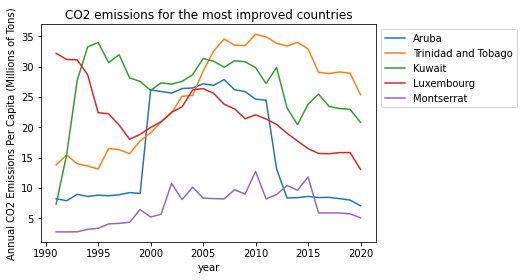

In [25]:
pt[sorted_diff.columns[:5]].iloc[-30:].plot()
plt.legend([col[1] for col in sorted_diff.columns[:5]], bbox_to_anchor=(1,1))
plt.title("CO2 emissions for the most improved countries")
plt.ylabel("Annual CO2 Emissions Per Capita (Millions of Tons)")

Text(0, 0.5, 'Annual CO2 Emissions Per Capita (Millions of Tons)')

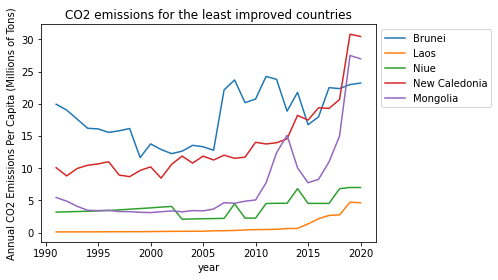

In [26]:
pt[sorted_diff.columns[-5:]].iloc[-30:].plot()
plt.legend([col[1] for col in sorted_diff.columns[-5:]], bbox_to_anchor=(1,1))
plt.title("CO2 emissions for the least improved countries")
plt.ylabel("Annual CO2 Emissions Per Capita (Millions of Tons)")

# CO2 from Coal-Burning (since 2010)

In [31]:
df['percent_coal_co2'] = df['coal_co2'] / df['co2'] * 100

df2 = df[df['year'] >= 2010].groupby(['country']).mean().dropna()
df2[['coal_co2', 'co2', 'percent_coal_co2']]

,coal_co2,co2,percent_coal_co2
country,,,
Australia,177.494727,405.577545,43.775268
Austria,13.818636,67.218182,20.515854
Belarus,3.160182,60.941636,5.191320
Belgium,14.379364,100.506727,14.267177
Brazil,63.507455,495.563455,12.822747
Bulgaria,25.639545,45.630909,55.772288
Canada,73.300364,567.442727,12.910003
Croatia,2.206273,18.541364,11.838480
Czechia,65.007000,106.251182,60.989589


In [32]:
print("MAX % COAL CO2: " + str(df2['percent_coal_co2'].max()))
print("MEAN % COAL CO2: " + str(df2['percent_coal_co2'].mean()))
print("MEDIAN % COAL CO2: " + str(df2['percent_coal_co2'].median()))

MAX % COAL CO2: 71.02519111140222
MEAN % COAL CO2: 27.27835504868272
MEDIAN % COAL CO2: 20.831288934532378


# CO2 from Coal-Burning (all years)

In [33]:
pt = pd.pivot_table(df, columns=['country'], index=['year'], values=['percent_coal_co2'])
pt

percent_coal_co2                                                   \
country      Afghanistan     Africa    Albania   Algeria Angola Argentina   
year                                                                        
1750                 NaN        NaN        NaN       NaN    NaN       NaN   
1751                 NaN        NaN        NaN       NaN    NaN       NaN   
1752                 NaN        NaN        NaN       NaN    NaN       NaN   
1753                 NaN        NaN        NaN       NaN    NaN       NaN   
1754                 NaN        NaN        NaN       NaN    NaN       NaN   
...                  ...        ...        ...       ...    ...       ...   
2016           42.668643  32.024612   4.252004       NaN    NaN  2.195029   
2017           50.262391  31.759527   5.186722  0.513115    NaN  2.278427   
2018           46.123427  32.512584   9.991550  0.823596    NaN  2.405301   
2019           61.998847  32.983168  11.289328  0.659498    NaN  1.540885   
2020           61.743421  33.641191  10.165380  0.709055    NaN  1.793882   

                                                                    ...  \
country   Armenia       Asia Asia (excl. China & India)  Australia  ...   
year                                                                ...   
1750          NaN        NaN                        NaN        NaN  ...   
1751          NaN        NaN                        NaN        NaN  ...   
1752          NaN        NaN                        NaN        NaN  ...   
1753          NaN        NaN                        NaN        NaN  ...   
1754          NaN        NaN                        NaN        NaN  ...   
...           ...        ...                        ...        ...  ...   
2016     0.076879  54.658957                  26.741231  43.689430  ...   
2017     0.072241  54.411814                  27.336496  42.669457  ...   
2018     0.068658  54.619477                  28.089333  40.778748  ...   
2019     0.054259  54.663892                  29.493692  39.580041  ...   
2020     0.067912  54.826619                  29.560025  40.780878  ...   

                                                                         \
country United States   Uruguay Uzbekistan Vanuatu Venezuela    Vietnam   
year                                                                      
1750              NaN       NaN        NaN     NaN       NaN        NaN   
1751              NaN       NaN        NaN     NaN       NaN        NaN   
1752              NaN       NaN        NaN     NaN       NaN        NaN   
1753              NaN       NaN        NaN     NaN       NaN        NaN   
1754              NaN       NaN        NaN     NaN       NaN        NaN   
...               ...       ...        ...     ...       ...        ...   
2016        26.290733  0.061350   6.558256     NaN  0.331018  42.310885   
2017        25.705280  0.064903   6.243409     NaN  0.192527  39.785095   
2018        23.877484  0.060874   8.417878     NaN  0.104013  42.431543   
2019        20.907391  0.030377   7.486931     NaN  0.076632  47.645134   
2020        18.856189  0.034247  10.064371     NaN  0.059095  49.580618   

                                                     
country       World     Yemen     Zambia   Zimbabwe  
year                                                 
1750     100.000000       NaN        NaN        NaN  
1751     100.000000       NaN        NaN        NaN  
1752     100.000000       NaN        NaN        NaN  
1753     100.000000       NaN        NaN        NaN  
1754     100.000000       NaN        NaN        NaN  
...             ...       ...        ...        ...  
2016      40.506719  3.442985  15.091005  64.807227  
2017      40.232164  3.386594  29.185208  59.121269  
2018      40.162879  3.305288  37.522221  59.903830  
2019      39.706336  2.634731  33.006953  54.982190  
2020      40.152826  2.723178  36.786855  59.415060  

[271 rows x 174 columns]

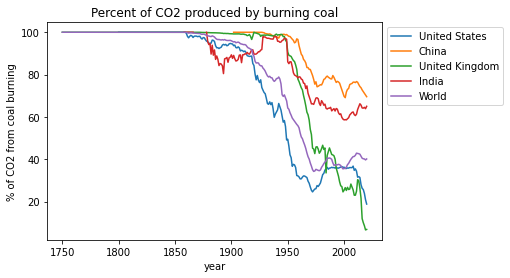

In [34]:
plotted_countries = ['United States', 'China', 'United Kingdom', 'India', 'World']
to_plot = [('percent_coal_co2', country) for country in plotted_countries]

pt[to_plot].plot()
plt.title("Percent of CO2 produced by burning coal")
plt.ylabel("% of CO2 from coal burning")
plt.legend(plotted_countries, bbox_to_anchor=(1,1))

# Discussion

The question of which countries have most reduced or most increased their CO2 emissions was answered directly by compiling a list of the changes of all countries. Additionally, the recent CO2 emissions of the best and worst countries by this metric were plotted to get a closer look at what's been happening with them recently. 

Perhaps we could look at what was happening in Aruba during its sharp decrease in emissions, or in Mongolia and New Caledonia during their sharp increases. Monsterrat ended up on the 'most improved' list, but really only decreased its emissions starting in 2015. 



The question of how many emissions are coal-burning related was also answered directly for every country (or, at least, the ones where data was sufficient). The general idea of how much coal-burning each country was doing was found by averaging data since 2012, and that data was further analyzed to reveal that the majority of countries' emissions are at least 20% coal-burning related, and some countries' emissions reach as high as 70%. 

Values were also computed for every year and country, and these values were plotted for some large countries and for the world to see how coal-reliant we've been over the last few centuries. For example, we can see that China has stayed fairly coal-based, while the UK has almost entirely eliminated CO2 emissions from coal-burning. They have been on a general downward trend (especially after 1950) as more energy sources are introduced. 